In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB

sys.path.insert(0, '../python/')
from helpers import *

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('../../data/train/cancellations.csv')

In [45]:
X = data[['hotel','market_segment', 'total_of_special_requests', 'total_nights', 'room_difference']].copy()
X.replace(['Resort Hotel', 'City Hotel'], [0, 1], inplace=True)
X.loc[np.argwhere((X['total_nights'] >= 8).values).flatten(), 'total_nights'] = 8
X.loc[np.argwhere((X['total_of_special_requests'] >= 2).values).flatten(), 'total_of_special_requests'] = 2
X = pd.get_dummies(X, columns=['market_segment', 'total_of_special_requests', 'total_nights']).to_numpy()
y = data[['is_canceled']].to_numpy()
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]

# Categorical

Text(0.5, 1.0, 'No Balancing')

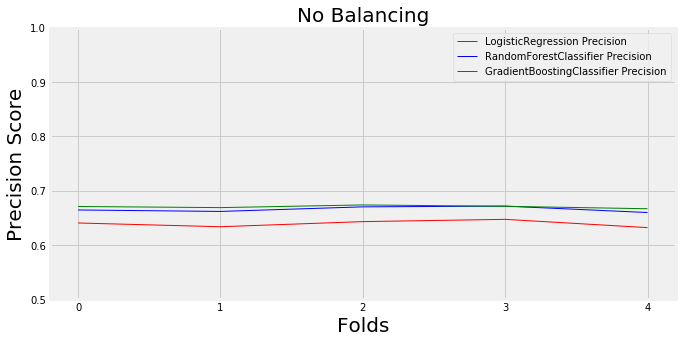

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_cross_val(models, X, y, ax, None, [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('No Balancing', fontsize=20)

Text(0.5, 1.0, 'Undersampling')

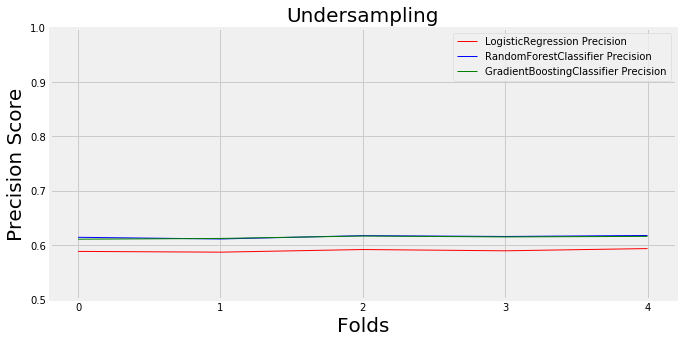

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'undersampling', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('Undersampling', fontsize=20)

Text(0.5, 1.0, 'Oversampling')

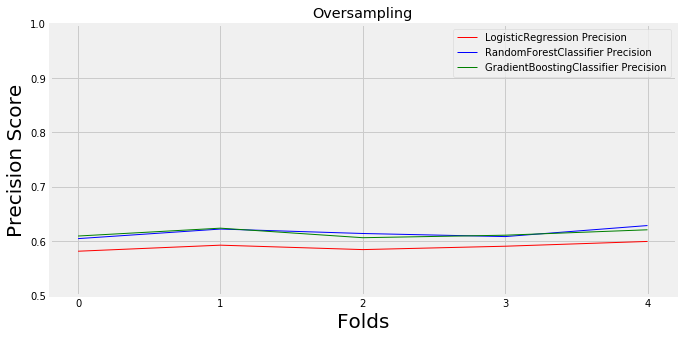

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'oversampling', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('Oversampling')

Text(0.5, 1.0, 'SMOTE')

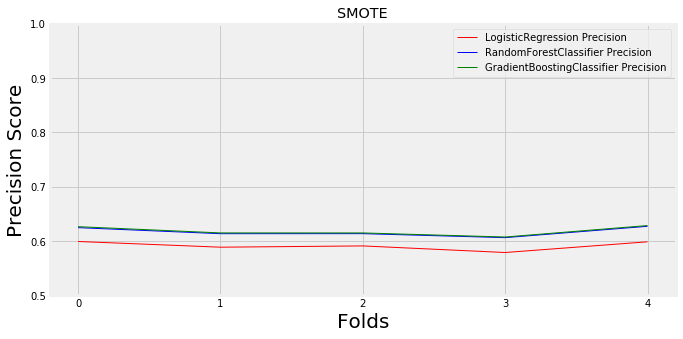

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'smote', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('SMOTE')

Text(0.5, 1.0, 'SMOTE + Undersampling')

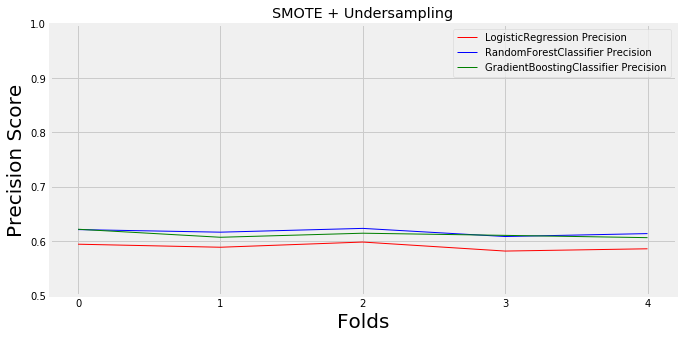

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'both', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('SMOTE + Undersampling')

# Numerical 

In [56]:
X = data[['hotel','market_segment', 'total_of_special_requests', 'total_nights', 'room_difference']].copy()
X.replace(['Resort Hotel', 'City Hotel'], [0, 1], inplace=True)
X = pd.get_dummies(X).to_numpy()

y = data[['is_canceled']].to_numpy()
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]

Text(0.5, 1.0, 'No Balancing')

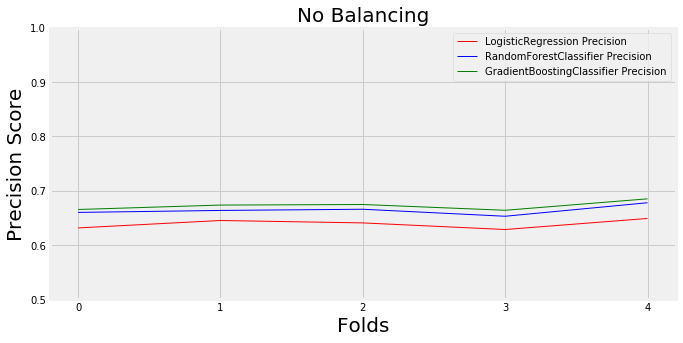

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_cross_val(models, X, y, ax, None, [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('No Balancing', fontsize=20)

Text(0.5, 1.0, 'Undersampling')

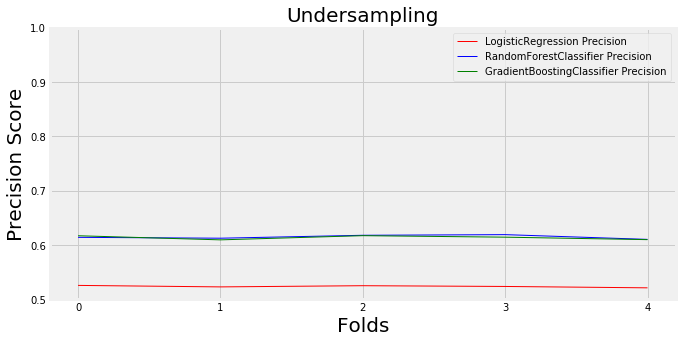

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'undersampling', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('Undersampling', fontsize=20)

Text(0.5, 1.0, 'Oversampling')

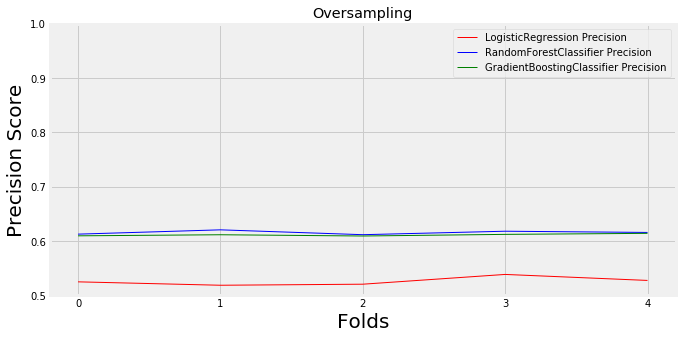

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'oversampling', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('Oversampling')

Text(0.5, 1.0, 'SMOTE')

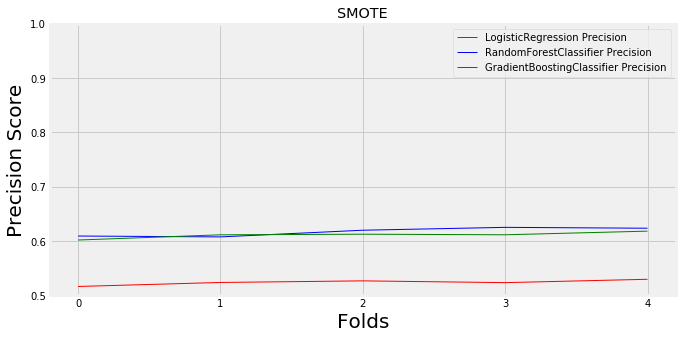

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'smote', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('SMOTE')

Text(0.5, 1.0, 'SMOTE + Undersampling')

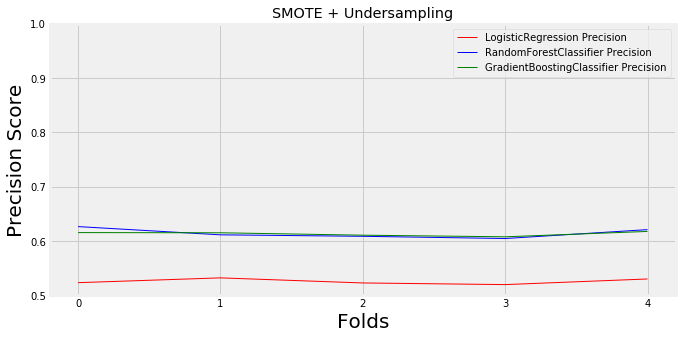

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_cross_val(models, X, y, ax, 'both', [m.__class__.__name__ for m in models])
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Folds', fontsize=20)
ax.set_ylabel('Precision Score', fontsize=20)
ax.set_title('SMOTE + Undersampling')